# CUSTOMER SEGMENTATION MODEL

Latar Belakang:

Segmentasi Pelanggan adalah pembagian pasar menjadi kelompok pelanggan terpisah yang memiliki karakteristik serupa. Segmentasi Pelanggan dapat menjadi sarana yang ampuh untuk mengidentifikasi kebutuhan pelanggan yang tidak terpuaskan. Sehingga kemudian perusahaan dapat mengembangkan produk dan layanan yang unik dan menarik untuk menarik pelanggan dan memuaskan pelanggan, dan dapat bersaing bahkan mengungguli perusahaan sejenis lainnya.

Melalui kartu keanggotaan pelanggan bisa membeli barang di mall atau supermarket baik secara kredit maupun tunai. Sehingga kita mempunyai beberapa data dasar tentang pelanggan sepert ID Pelanggan, usia, jenis kelamin, pendapatan tahunan, dan skor pengeluaran. Dengan data ini kita ingin memahami pelanggan, seperti apa karakteristik dari masing-masing pelanggan sehingga kita dapat memberikan masukan kepada tim pemasaran dan merencanakan strategi yang sesuai.

Dari dataset yang tersedia adalah cocok dengan segmentasi demografi. Sehingga kita bisa menentukan kesesuaian antara produk dengan latar belakang target konsumen.

Dataset:

ID: ID unik pelanggan.
Sex: Jenis kelamin biologis (jenis kelamin) pelanggan. 0 = laki-laki / 1 = perempuan

Marital status: Status perkawinan pelanggan. 0 = single / 1 = menikah

Age: Usia pelanggan dalam tahun, dihitung sebagai tahun saat ini dikurangi tahun kelahiran pelanggan pada saat pembuatan kumpulan data (Usia min. = 18 / Usia maks. = 78)

Education:Tingkat pendidikan pelanggan. 0=tidak berpendidikan / 1=SMA / 2=universitas / 3=lulusan

Income: Pendapatan tahunan yang dilaporkan sendiri dalam dolar AS dari pelanggan.

Occupation: Kategori pekerjaan pelanggan. 0=pengangguran / 1=karyawan/pejabat / 2=manajemen atau wiraswasta

Settlement size: Ukuran kota tempat pelanggan tinggal. 0=kecil / 1=ukuran sedang / 2=besar

## Proses Umum

### Import Library

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [4]:
df = pd.read_csv('segmentation data.csv')

In [5]:
df.sample(10)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
430,100000431,0,0,74,2,122133,0,0
399,100000400,1,1,43,2,126449,0,0
1779,100001780,0,0,28,0,61824,0,0
1614,100001615,0,0,24,0,66447,0,0
293,100000294,0,0,56,1,168714,1,1
1153,100001154,0,1,34,1,110145,1,2
941,100000942,0,0,31,0,69571,0,0
1006,100001007,0,0,60,2,136671,1,1
605,100000606,0,0,22,0,131699,1,1
481,100000482,0,0,26,0,101270,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


Notes:

*   Ada 8 kolom dan 2000 baris.
*   Kolom ID tidak akan digunakan karena tidak mempengaruhi terhadap suatu model, sehingga kolom ID bisa kita drop.
*   Sex, Marital Status, Education, Occupation, Settlement size sebenarnya adalah kategori atau object. Untuk keperluan analisis kita harus menggantinya menjadi type string. 



In [7]:
df.drop('ID',axis=1,inplace=True)

# EDA (Analisis Data)

In [10]:
num_columns = ['Age','Income']
cat_columns = ['Sex','Marital status','Education','Occupation','Settlement size']

df[cat_columns] = df[cat_columns].astype(str)

## Univariate Analysis

### Numerical Variable Distribution

In [13]:
df.describe().applymap('{0:.0f}'.format).T

,count,mean,std,min,25%,50%,75%,max
Age,2000,36,12,18,27,33,42,76
Income,2000,120954,38109,35832,97663,115548,138072,309364


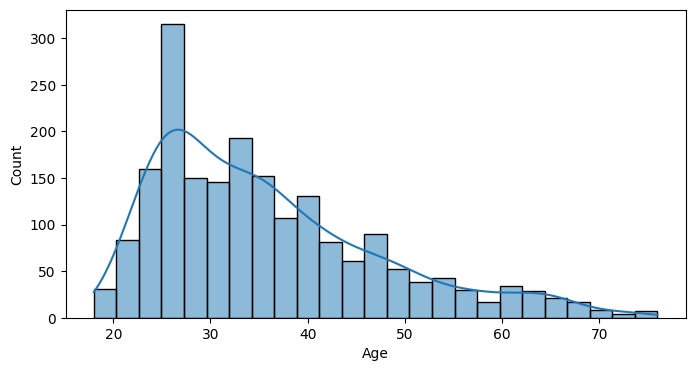

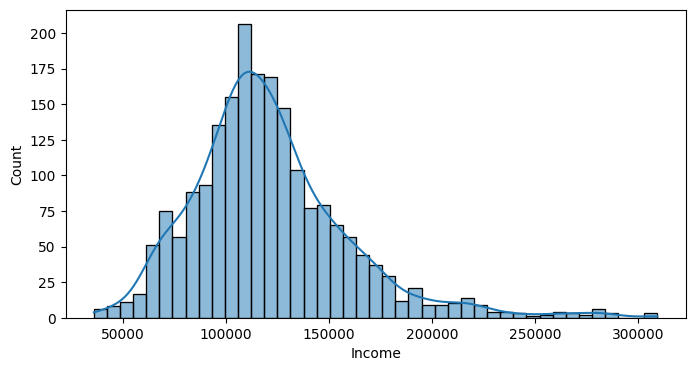

In [11]:
for numerical in num_columns:
  plt.figure(figsize=(8,4))
  sns.histplot(data=df, x=numerical, kde=True)

Notes:

*   Rata-rata usia pelanggan sekitar 36 tahun.
*   Usia termuda 18 tahun dan paling tua 76 tahun.
*   Kebanyakan pelanggan berusia diantara 24 - 48 tahun.
*   Rata-rata pendapatannya sekitar 120.954
*   Pendapatan paling kecil 35.832 dan paling besar 309.364
*   Sebagian besar pelanggan mempunyai pendapatan antara 85.000 - 155.000
*   Untuk income secara visual data hampir terdistribusi normal tapi sedikit skew ke kanan, ada outlier.


Notes:

*   Rata-rata usia pelanggan sekitar 36 tahun.
*   Usia termuda 18 tahun dan paling tua 76 tahun.
*   Kebanyakan pelanggan berusia diantara 24 - 48 tahun.
*   Rata-rata pendapatannya sekitar 120.954
*   Pendapatan paling kecil 35.832 dan paling besar 309.364
*   Sebagian besar pelanggan mempunyai pendapatan antara 85.000 - 155.000


### Categorical Variable Distribution

In [14]:
df.describe(include='object').T

,count,unique,top,freq
Sex,2000,2,0,1086
Marital status,2000,2,0,1007
Education,2000,4,1,1386
Occupation,2000,3,1,1113
Settlement size,2000,3,0,989


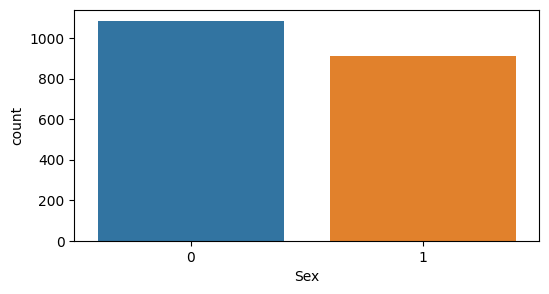

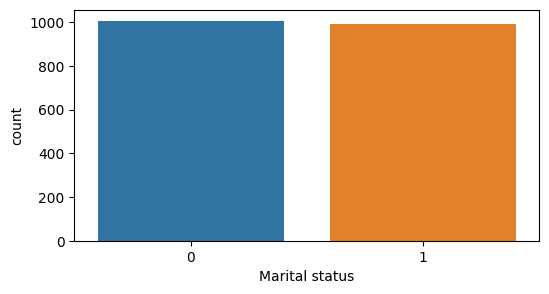

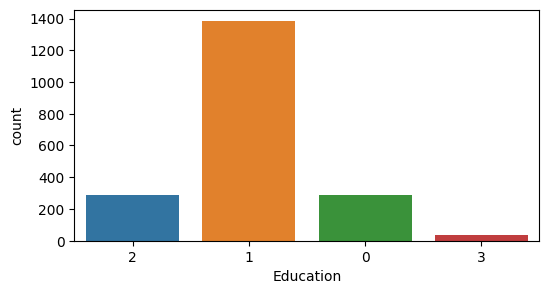

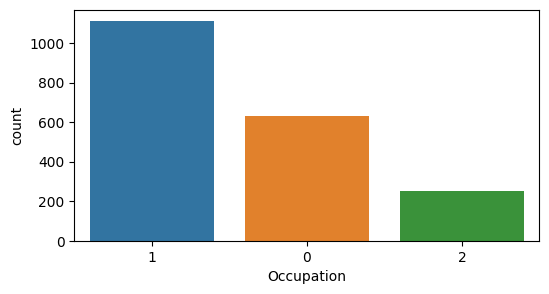

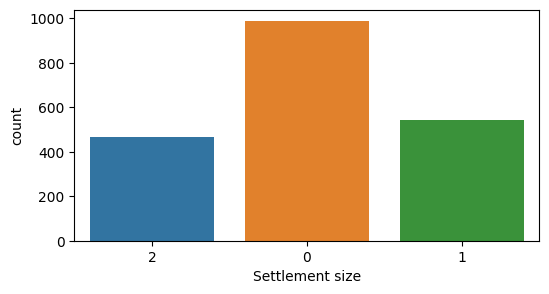

In [15]:
for categorical in cat_columns:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=categorical)

Notes:

*   Pelanggan laki-laki sedikit lebih banyak sekitar 1086 dibandingkan perempuan sekitar 914.
*   Status pernikahan seimbang antara yang single dan menikah.
*   Kebanyakan pelanggan berusia diantara 24 - 48 tahun.
*   Tingkat pendidikan pelanggan paling banyak adalah lulusan SMA.
*   Pelanggan kebanyakan pekerjaannya sebagai karyawan.
*   Dan sebagian besar para pelanggan berasal dari kota kecil.


## Bivariate Analysis

### Numerical Features

<Axes: xlabel='Age', ylabel='Income'>

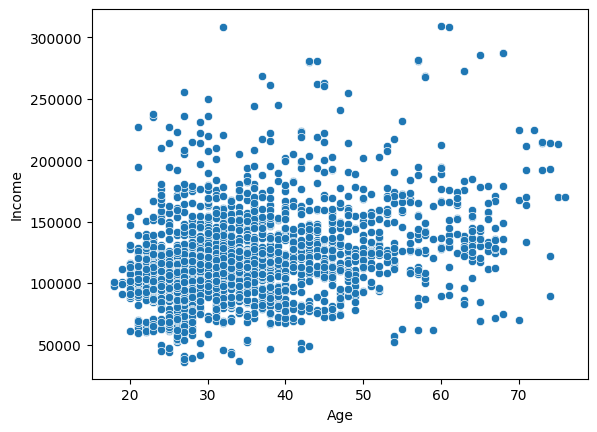

In [16]:
sns.scatterplot(data=df,x='Age',y='Income')

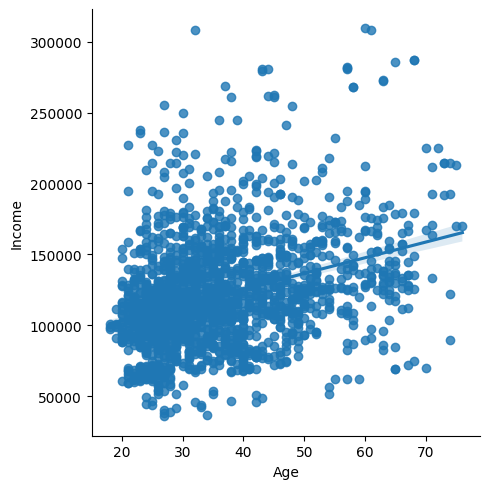

In [17]:
sns.lmplot(data=df, x='Age', y='Income')

In [18]:
import scipy.stats as stats
print(stats.pearsonr(df['Age'],df['Income']))

PearsonRResult(statistic=0.34061016373173514, pvalue=1.6443825442386822e-55)


Notes:

*   Dari diagram tidak terlihat pola yang jelas antara age dan income.
*   Dari diagram lmplot garis regresi pun terlihat landai artinya korelasi keduanya tidak kuat.
*   Dari Korelasi menggunakan pearson didapat korelasi yang tidak kuat antara income dan age, artinya tidak seiring bertambah umur maka pendapatan meningkat. Karena ada hal-hal lain yang mempengaruhi.



### Categorical Vs Numerical

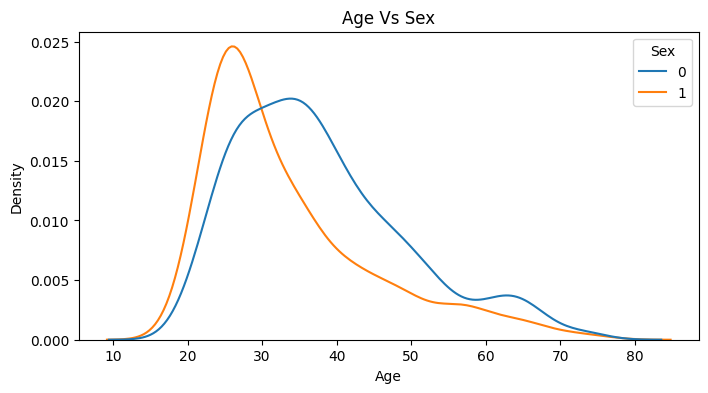

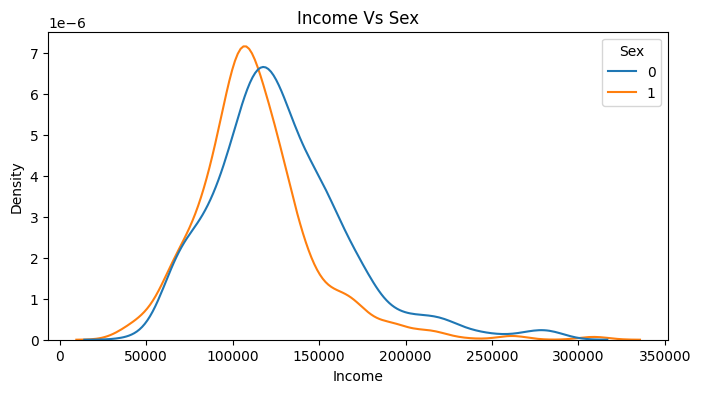

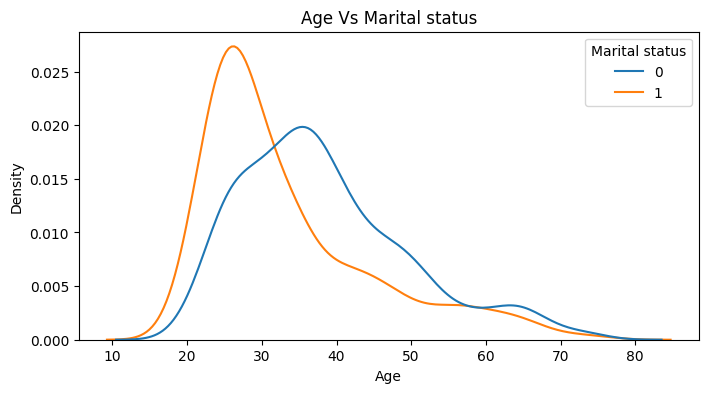

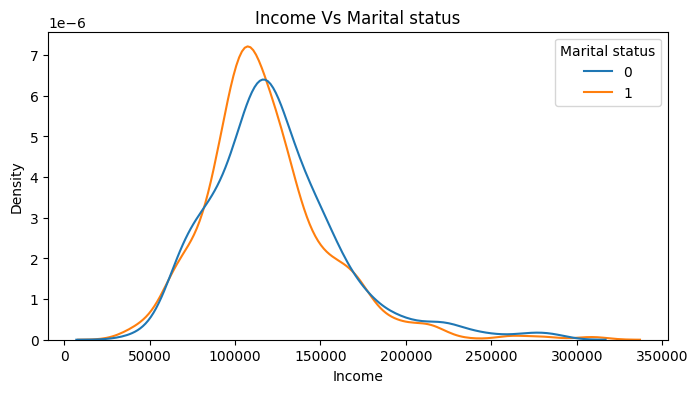

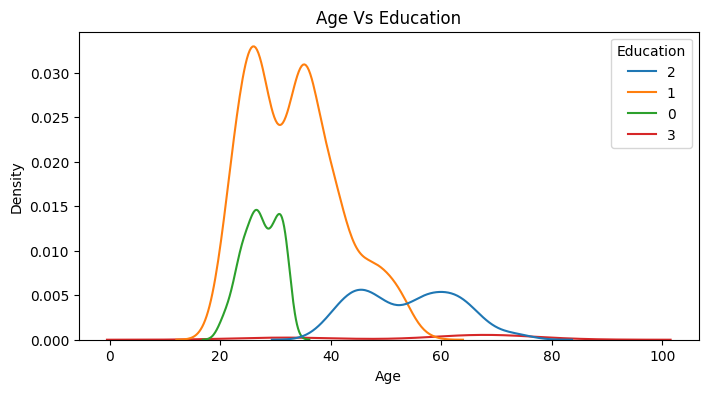

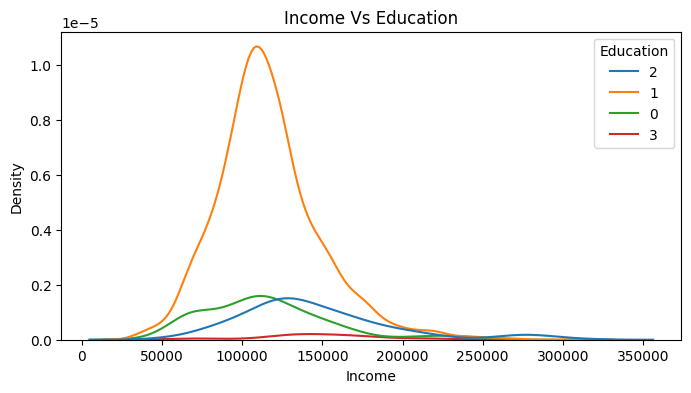

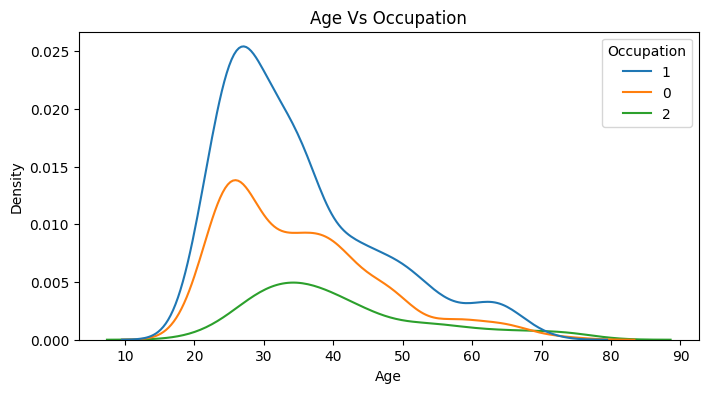

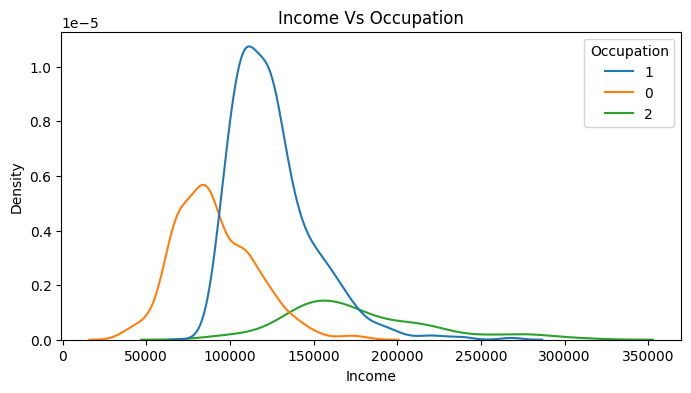

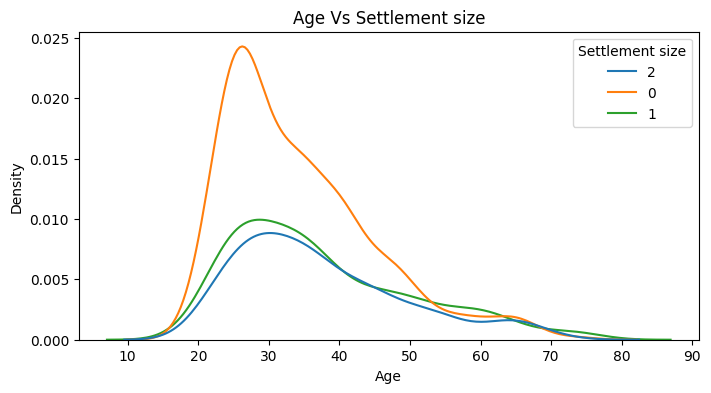

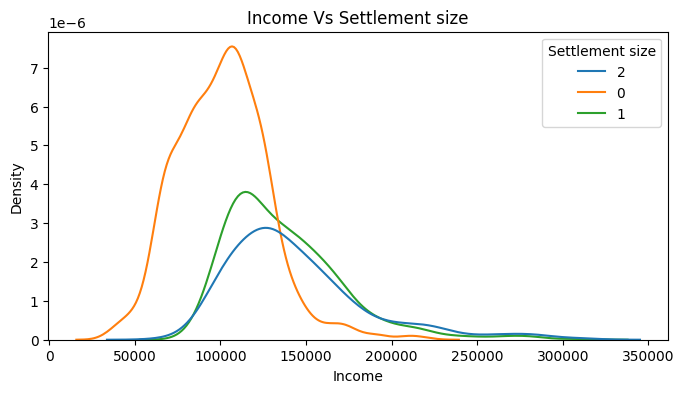

In [19]:
for category in cat_columns:
  for numerical in num_columns:
      plt.figure(figsize=(8,4))
      sns.kdeplot(data=df,x=numerical,hue=category)
      plt.title(f'{numerical} Vs {category}', fontsize=12)

Notes:

*   Usia dibawah 30 tahun sebagian besar adalah perempuan, dan diatas 30 tahun kebanyakan laki-laki.
*   Pendapatan laki-laki dan perempuan tidak terlalu jauh berbeda, di bawah 120.000 sedikit lebih banyak perempuan dan di atas 120.000 sedikit lebih banyak laki-laki.
*   Yang menarik adalah pada status pernikahan, usia dibawah 32 tahun lebih banyak pelanggan berstatus menikah, terjadi pergesar diatas 32 tahun ditemukan status single lebih banyak. Mungkin dikarenakan banyak perceraian di usia tua atau bahkan salahsatu pasangan meninggal.
*   Status pernikahan tidak berpengaruh terhadap pendapatan, antara kedua status menunjukkan pula yang sama.
*   Lulusan SMA banyak ditemukan di rentang usia 20-60 tahun. Yang tidak berpendidikan banyak ditemukan di rentang usia 20-35 tahun. Lulusan kuliah banyak ditemukan di rentang usia 35-80 tahun. Dan lulusan pasca sarjana jumlahnya paling sedikit dan lebih banyak ditemukan di rentang usia 45 - 80 tahun.  
*   Sebagian besar yang tidak bekerja mendapatkan pendapatan sekitar 80.000, yang bekerja sekitar 120.000 dan wirasawta dikisaran 160.000
*   Di kota kecil rata-rata pendapatannya dibawah 100.000, di kota sedang rata-rata pendapatannya antara 100.000 - 120.000 sedangkan di kita besar pendapatannya lebih dari 120.000 


### Categorical vs Categorical

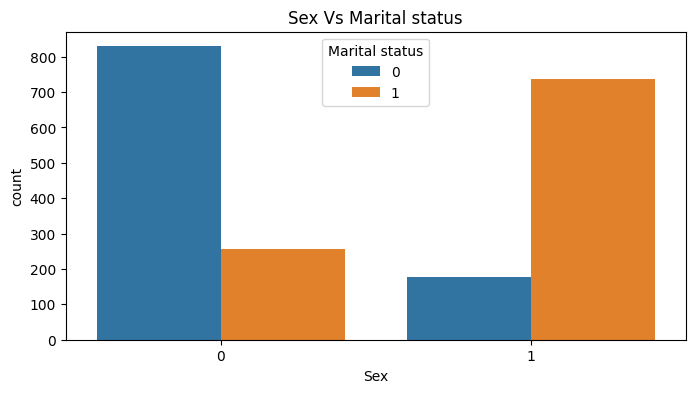

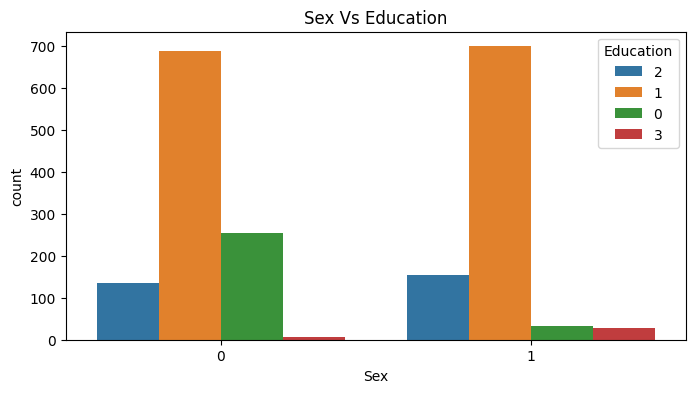

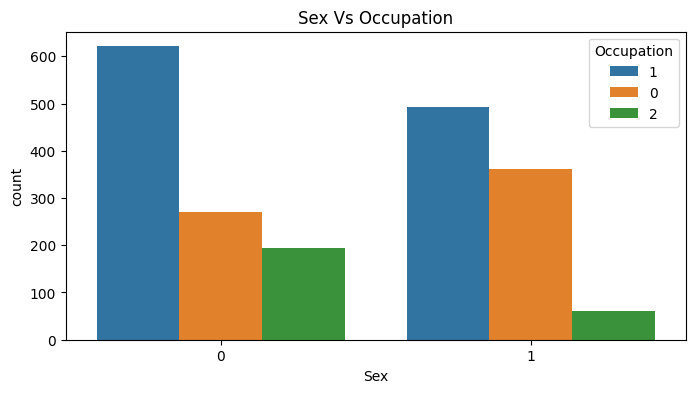

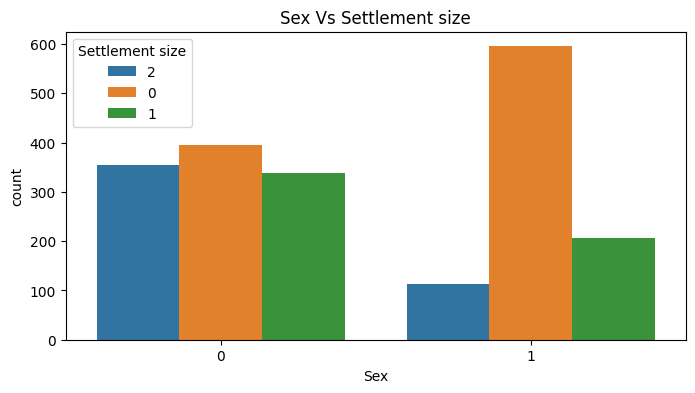

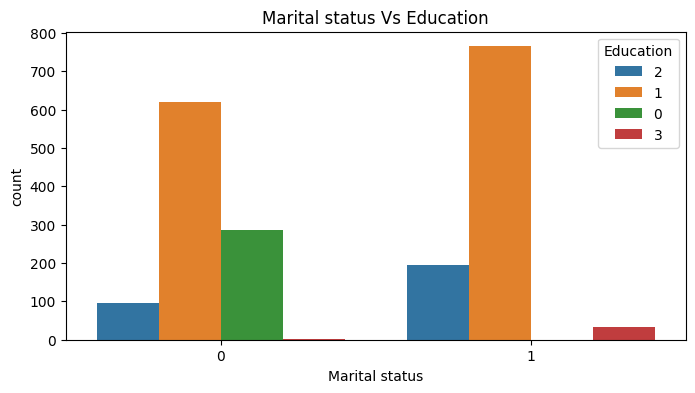

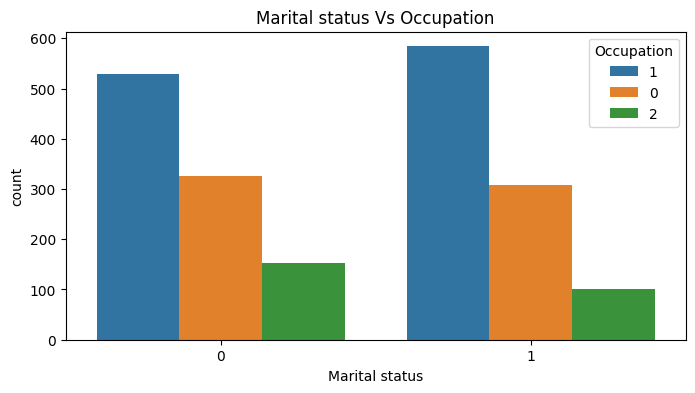

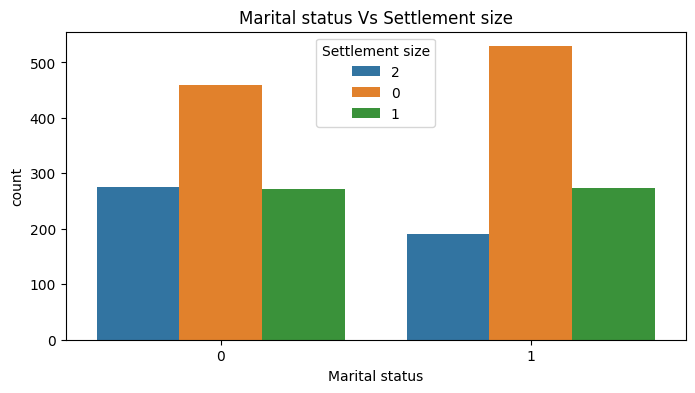

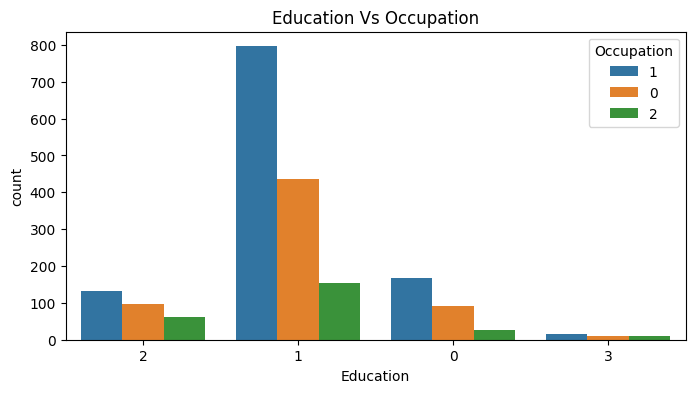

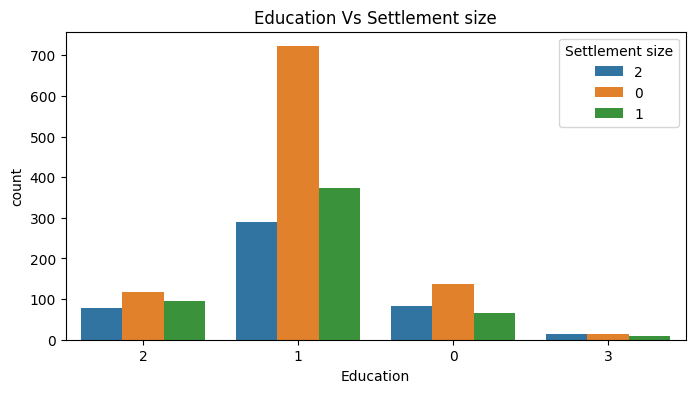

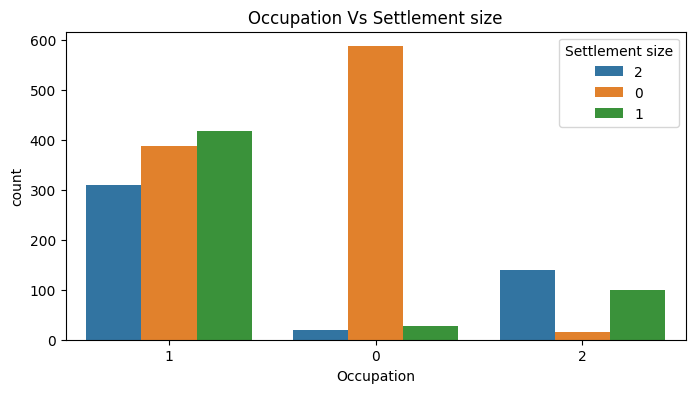

In [20]:
cat_aux = cat_columns.copy()
for category1 in cat_columns:
    cat_aux.pop(0);
    for category2 in cat_aux:
        if category1 != category2:
            plt.figure(figsize=(8,4))
            sns.countplot(data=df, x=category1, hue=category2)
            plt.title(f'{category1} Vs {category2}',fontsize=12)

Notes:

*   Laki-laki lebih banyak single dibandingkan menikah, sedangkan sebaliknya pada perempuan lebih banyak menikah dibandingkan single.
*   Antara perempuan dan laki-laki tingkat pendidikannya paling banyak adalah SMA. Tetapi banyak ditemukan yang tidak berpendidikan adalah laki-laki. Untuk lulusan pasca sarjana sebagian besar adalah perempuan.
*   Yang tidak bekerja banyak dijumpai pada perempuan, untuk karyawan dan wiraswasta sebagian besar adalah laki-laki.
*   Laki-laki merata mereka tinggal di semua kota. Sedangkan perempuan sebagian besar tinggal di kota kecil.
*   Lulusan SMA kebanyakan berstatus single walaupun yang menikah terbilang cukup banyak juga. Yang tidak berpendidikan hampir semuanya adalah single.Lulusan sarjana dan pasca sarjana hampir sebagian besar sudah menikah.
*   Single dan menikah distribusi pekerjaannya hampir sama. 
*   Di kota kecil jumlah yang menikah lebih banyak dibandingkan yang single. Di kota sedang seimbang antara yang single dan menikah. Sedangkan di kota besar jumlah yang single lebih banyak dibandingkan yang menikah.
*   Lulusan SMA paling banyak bekerja sebagai karyawan, tetapi juga pengangguran paling banyak adalah lulusan SMA.
*   Hampir semua yang tidak bekerja tinggal di kota kecil, sedangkan karyawan mereka tinggal di setiap kota dengan jumlah yang cukup banyak. Wiraswasta lebih memilih tinggal di kota besar atau sedang.

### Categorical vs Numeric

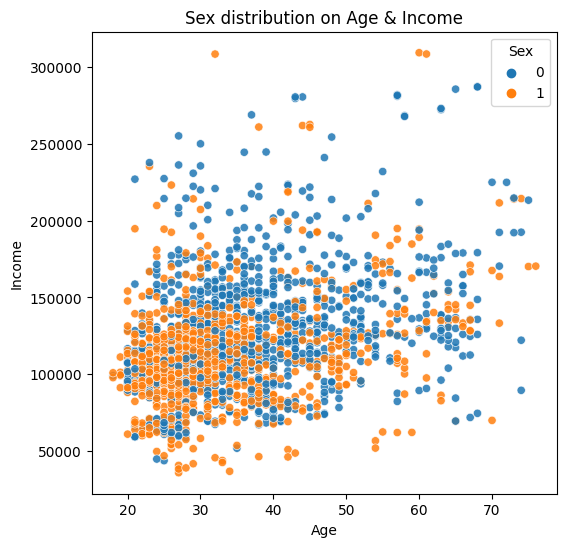

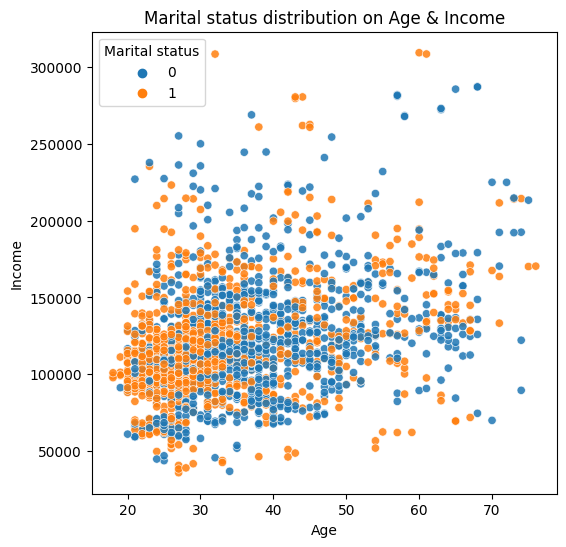

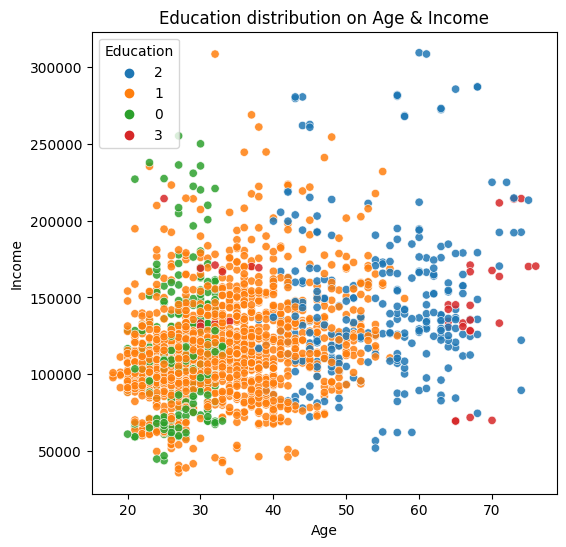

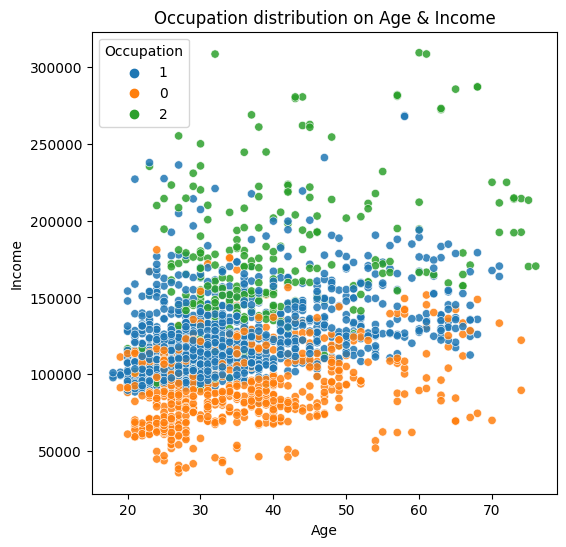

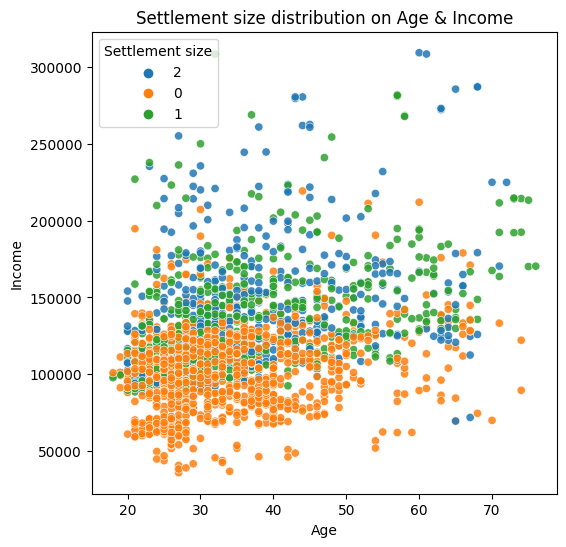

In [21]:
for cat in cat_columns:
    plt.figure(figsize=(6,6))
    sns.scatterplot(x='Age', y='Income', data=df, hue=cat, alpha=0.85)
    plt.title(f'{cat} distribution on Age & Income', fontsize=12)

Notes:

*   Untuk umur dan pendapatan, Laki-laki dan perempuan hampir merata sebarannya.
*   Begitupun status pernikahan hampir tersebar merata.
*   Usia lebih dari 55 tahun di seluruh pendapatan, hampir semua tingkat pendidikannya adalah lulusan sarjana dan pasca sarjana.
*   Yang tidak bekerja rata-rata disemua umur berada dibawah 100.000.
*   Sedangkan wiraswasta diatas 150.000 di segala usia.
*   Pelanggan dengan pendapatan diatas 150.000 disegala usia rata-rata lebih memilih tinggal di kota sedang atau besar.
*   Sedangkan pelanggan dengan penghasilan di bawah 150.000 lebih memilih tinggal di kota kecil.

## Feature Transforming and Scaling

H0 : Distribusi Normal
H1 : Distribusi Tidak Normal

In [22]:
from scipy import stats

normaltest_result_age    = stats.normaltest(df['Age'])[1]
normaltest_result_income = stats.normaltest(df['Income'])[1]

print(f'The p-value for the null hypothesis of the Income being Normally distributed is {normaltest_result_income}')
print(f'The p-value for the null hypothesis of the Age    being Normally distributed is {normaltest_result_age}')

The p-value for the null hypothesis of the Income being Normally distributed is 2.5009638879187734e-98
The p-value for the null hypothesis of the Age    being Normally distributed is 3.3428344869999675e-56


Karena P-value sangat kecil, keputusan yang diambil adalah tolak H0 atau distribusi tidak normal. 

Untuk mengubah data menjadi normal, digunakan log transformation dan power transformation.

### Feature Income

In [23]:
from sklearn.preprocessing import PowerTransformer

def apply_log(column):
    return np.log(column)

def normality_test(column):
    return stats.normaltest(column)

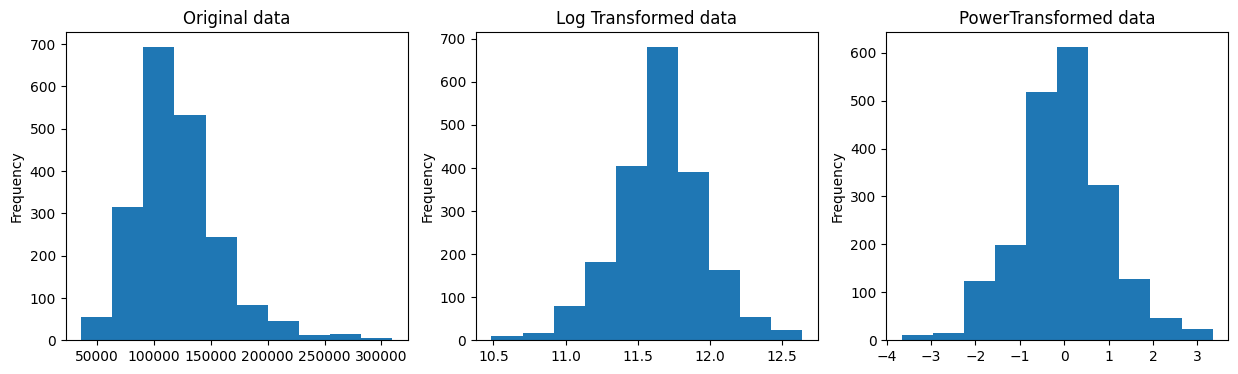

In [24]:
# PowerTransform data
feature = df['Income'].to_numpy().reshape(-1,1)

powtr = PowerTransformer()
feature_transf = powtr.fit_transform(feature)
array_1d = feature_transf.flatten()
feature = pd.Series(data=array_1d, index=list(range(len(array_1d))))

# Log Transform data
log_transformed_income = apply_log(df['Income'])

# Create axis for original data plot (ax1) and transformed data (ax2)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4));

# Plot original data & get metrics
df['Income'].plot(kind='hist', ax=ax1)
ax1.title.set_text('Original data')
norm_test1 = normality_test(df['Income'])

# Plot log transformed data & get metrics
log_transformed_income.plot(kind='hist', ax=ax2);
ax2.title.set_text('Log Transformed data')
norm_test2 = normality_test(log_transformed_income)

# Plot power transformed data & get metrics
feature.plot(kind='hist', ax=ax3);
ax3.title.set_text('PowerTransformed data')
norm_test3 = normality_test(feature)

# Create a DataFrame that shows normality test results for each tranformation
norm_results = [norm_test1, norm_test2, norm_test3]
metrics = pd.DataFrame(norm_results, index=['Original data', 'Log transform', 'PowerTransformer'])

In [25]:
metrics

,statistic,pvalue
Original data,449.473326,2.500964e-98
Log transform,32.357037,9.413664e-08
PowerTransformer,27.859212,8.921730e-07


### Feature Age

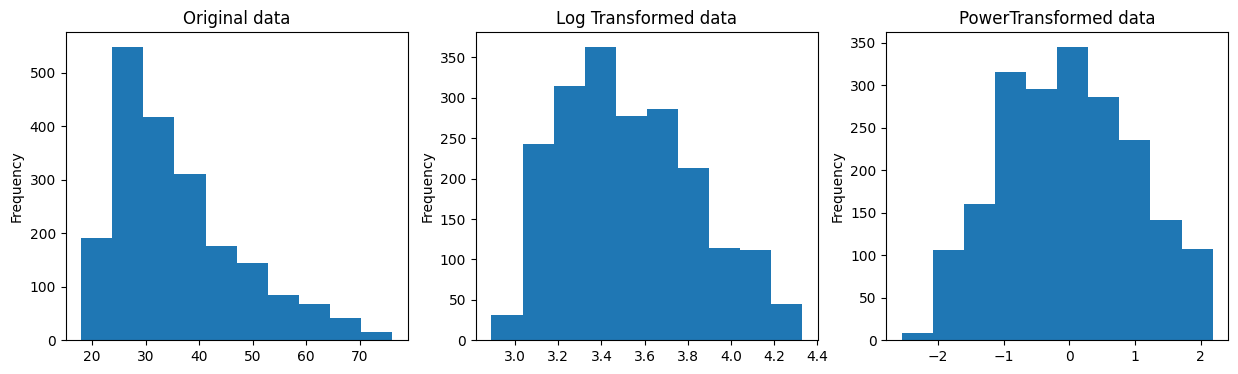

In [26]:
# PowerTransform data
feature2 = df['Age'].to_numpy().reshape(-1,1)

powtr = PowerTransformer()
feature_transf = powtr.fit_transform(feature2)
array_1d = feature_transf.flatten()
feature2 = pd.Series(data=array_1d, index=list(range(len(array_1d))))

# Log Transform data
log_transformed_age = apply_log(df['Age'])

# Create axis for original data plot (ax1) and transformed data (ax2)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4));

# Plot original data & get metrics
df['Age'].plot(kind='hist', ax=ax1)
ax1.title.set_text('Original data')
norm_test1 = normality_test(df['Age'])

# Plot log transformed data & get metrics
log_transformed_age.plot(kind='hist', ax=ax2);
ax2.title.set_text('Log Transformed data')
norm_test2 = normality_test(log_transformed_age)

# Plot power transformed data & get metrics
feature2.plot(kind='hist', ax=ax3);
ax3.title.set_text('PowerTransformed data')
norm_test3 = normality_test(feature2)

# Create a DataFrame that shows normality test results for each tranformation
norm_results = [norm_test1, norm_test2, norm_test3]
metrics = pd.DataFrame(norm_results, index=['Original data', 'Log transform', 'PowerTransformer'])

In [27]:
metrics

,statistic,pvalue
Original data,255.475892,3.342834e-56
Log transform,111.094201,7.519703e-25
PowerTransformer,161.196197,9.924088e-36


Setelah menjalankan test, kita melihat bahwa data belum terdistribusi secara normal, sehingga baik transformasi log maupun power transformer tidak dapat membuatnya menjadi distribusi normal. 


Meskipun kita mendapatkan data yang masih belum terdistribusi secara normal, data tersebut telah meningkat secara signifikan dari pengujian awal. Jadi kita akan menggunakan data yang diubah ini menjadi gantinya.

*   Untuk fitur 'Age', kita ubah menggunakan Log Transform
*   Untuk fitur 'Income', kita ubah menggunakan Power Transformer



### Definitive Feature Transformations:

In [28]:
df['transf_income'] = feature
df['transf_age']    = log_transformed_age

In [29]:
customer_transformed = df.drop(['Income', 'Age'], axis=1)
customer_transformed

,Sex,Marital status,Education,Occupation,Settlement size,transf_income,transf_age
0,0,0,2,1,2,0.239545,4.204693
1,1,1,1,1,2,0.869781,3.091042
2,0,0,1,0,0,-0.846121,3.891820
3,0,0,1,1,1,1.303766,3.806662
4,0,0,1,1,1,0.830970,3.970292
...,...,...,...,...,...,...,...
1995,1,0,1,0,0,0.209208,3.850148
1996,1,1,1,1,0,0.051991,3.295837
1997,0,0,0,0,0,-0.948374,3.433987
1998,1,1,1,0,0,-0.545364,3.178054


### Feature Scaling (MinMax Scaler)

Karena ada fitur kategorikal yang nilainya antara 0 dan 1 (fitur 'sex'), kita akan menggunakan MinMaxScaler scikit-learn untuk scale data antara 0 dan 1. Hal ini dilakukan agar skalanya setara dengan fitur sex (semua nilai akan berada diantara 0 dan 1). Ini penting untuk model K-Means, karena menggunakan distance sebagai pengukuran similarity. Oleh karena itu, jika kita tidak scaling fitur, kita tyidak akan mendapatkan cluster yang akurat.

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(customer_transformed)

In [31]:
from sklearn.cluster import KMeans

### Elbow Methods

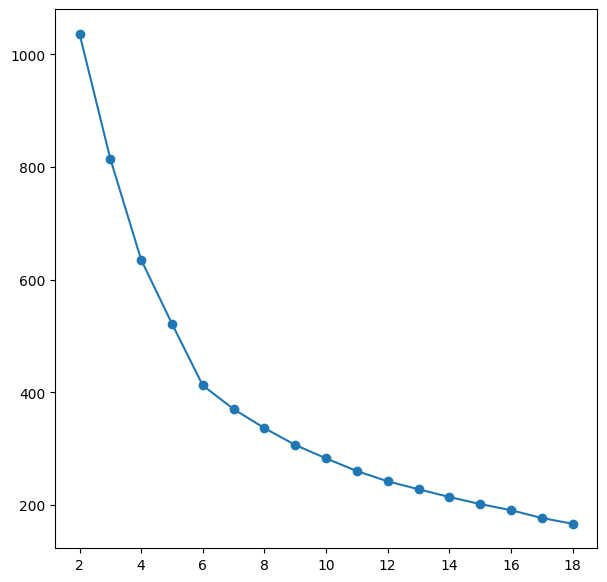

In [32]:
clusters_range=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
inertias=[]

for c in clusters_range:
    kmeans=KMeans(n_clusters=c, random_state=0).fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,7))
plt.plot(clusters_range,inertias, marker='o')

### Silhouette scores

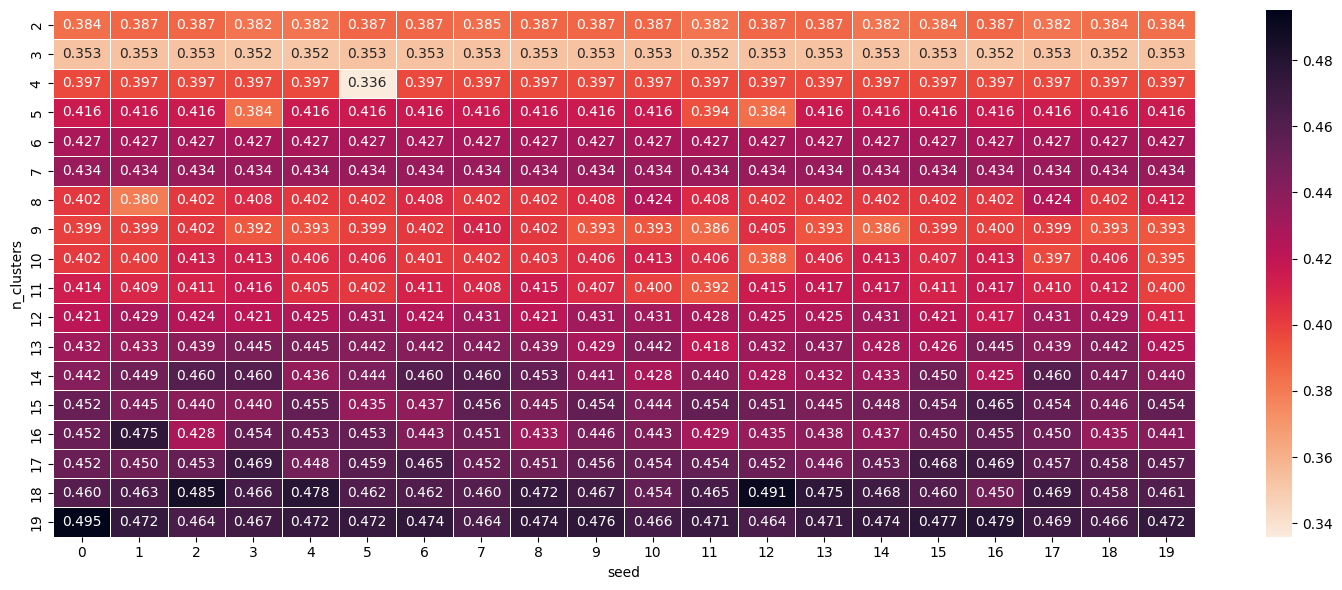

In [33]:
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range=range(2, 20)
random_range  =range(0, 20)
results=[]

for c in clusters_range:
    for r in random_range:
        clusterer=KMeans(n_clusters=c, random_state=r)
        cluster_labels=clusterer.fit_predict(X)
        silhouette_avg=silhouette_score(X, cluster_labels)
        results.append([c,r,silhouette_avg])

result  =pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km=pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

Dari grafik yang ditunjukkan di atas, kita melihat bahwa ada spike Silhouette score untuk cluster 6 - 7 yang koheren dengan hasil yang kita dapatkan dari metode elbow. Hasil ini menunjukkan bahwa memilih 6 atau 7 cluster menghasilkan kelompok yang terpisah.

Kita putuskan untuk membuat 6 atau 7 cluster dan menggunakan business understanding kita untuk menentukan klasifikasi mana yang memberikan lebih banyak knowledge tentang customer. Pilihan lain adalah memilih 14 atau lebih, yang tidak realistis mengingat data tidak terlalu besar

## Re-running the models for 6 or 7 clusters

### Creating a 3D dataset with PCA

PCA (Principal Component Analysis) adalah algoritma yang dapat mengurangi dimensi (dimensionality reduction). kita dapat memanfaatkan PCA untuk visualisasi data yang memiliki dimensi yang tinggi

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)

In [36]:
X_pca_df = pd.DataFrame(data=X_pca, columns=['X1', 'X2', 'X3'])

### Applying K-Means with 6 clusters and visualizing the result with PCA decompositions.

In [37]:
kmeans=KMeans(n_clusters=6, random_state=0).fit(X)

Label ditambahkan ke dataframe untuk memberikan kategori pada visualisasi.

In [38]:
labels = kmeans.labels_
X_pca_df['Labels'] = labels

In [39]:
X_pca_df.head()

,X1,X2,X3,Labels
0,0.829143,0.350518,-0.162403,3
1,-0.531854,0.719504,-0.230299,2
2,0.489493,-0.693627,0.175269,0
3,0.712487,-0.027906,-0.049583,3
4,0.718334,-0.036815,-0.052850,3


In [40]:
X_pca_df['Labels'] = X_pca_df['Labels'].astype(str)

## Visualization

In [41]:
import plotly.express as px

fig = px.scatter_3d(X_pca_df, x='X1', y='X2', z='X3',
              color=X_pca_df['Labels'])
fig.show()

In [42]:
results_df = df.drop(['transf_income', 'transf_age'], axis=1)
results_df['Labels'] = kmeans.labels_
results_df = results_df.astype({'Sex':'int32', 'Marital status':'int32', 'Education':'int32', 'Occupation':'int32', 'Settlement size':'int32'})
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int32
 1   Marital status   2000 non-null   int32
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int32
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int32
 6   Settlement size  2000 non-null   int32
 7   Labels           2000 non-null   int32
dtypes: int32(6), int64(2)
memory usage: 78.2 KB


## Ringkasan Statistik untuk setiap cluster

In [44]:
summary = {}

for index in range(6):
    summary[index] = results_df[results_df['Labels'] == index].describe().T  # .describe method provides general statistics about the data

## Interpreting Cluster

### Cluster 0

In [45]:
summary[0].applymap('{0:.0f}'.format)

,count,mean,std,min,25%,50%,75%,max
Sex,312,0,0,0,0,0,0,0
Marital status,312,0,0,0,0,0,0,0
Age,312,38,11,21,30,36,42,74
Education,312,1,1,0,0,1,1,2
Income,312,102566,26585,43684,81804,103618,120397,219319
Occupation,312,0,1,0,0,0,1,2
Settlement size,312,0,0,0,0,0,0,1
Labels,312,0,0,0,0,0,0,0


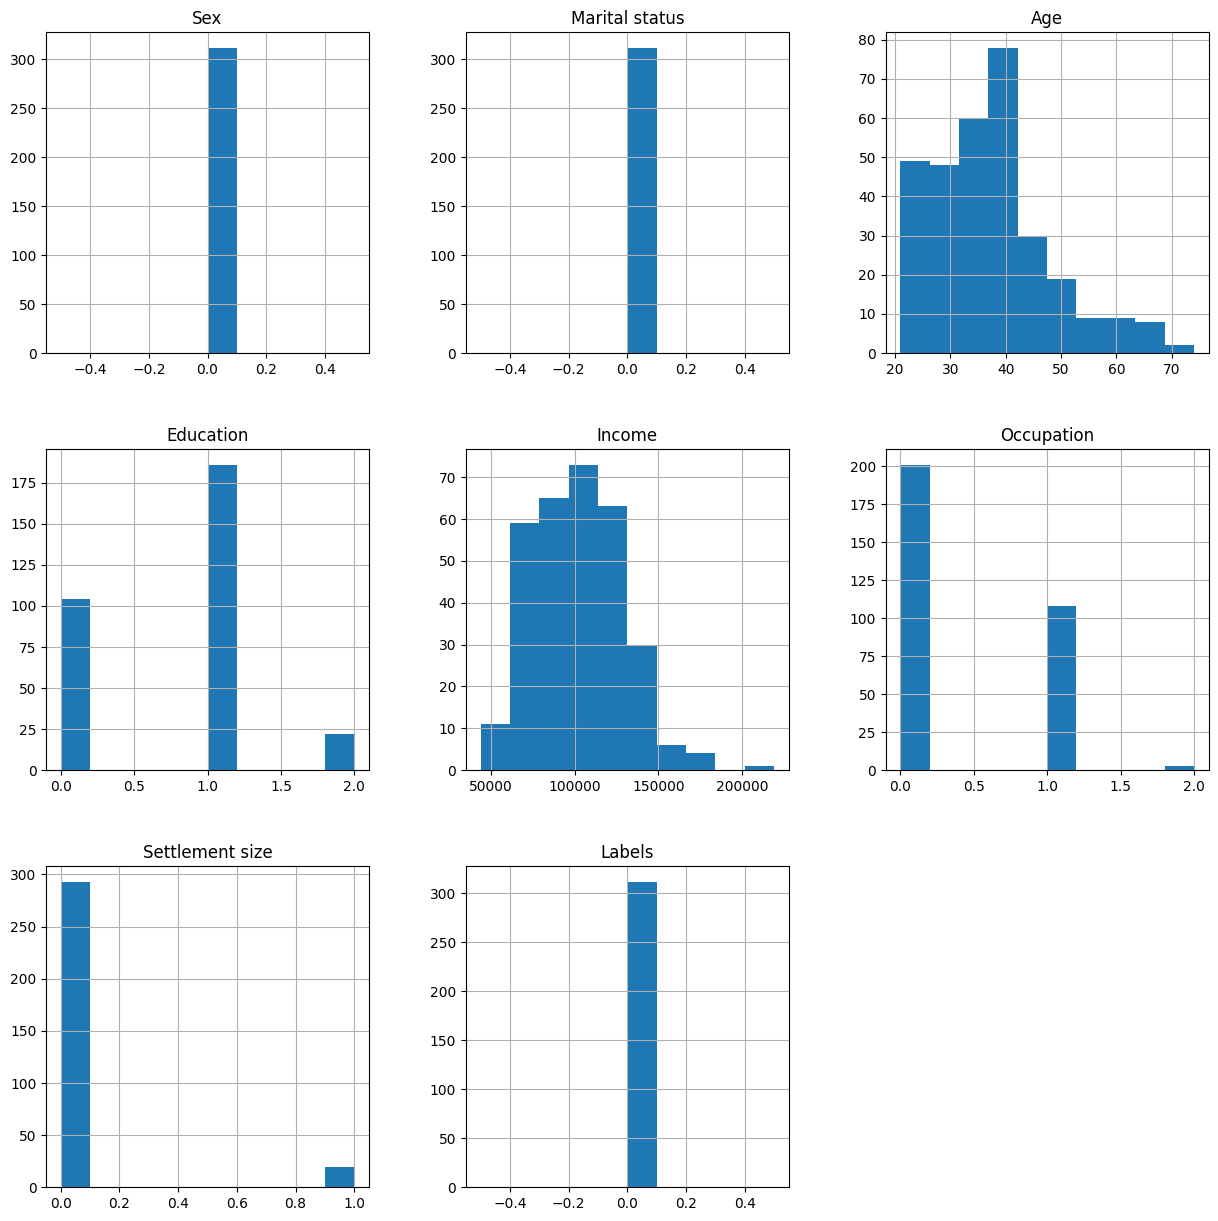

In [46]:
results_df[results_df['Labels'] == 0].hist(figsize=(15,15));

Notes:

* Sex : Laki-laki 
  
  Marital Status : Single
  
  Education : Rata-rata lulusan SMA atau tidak berpendidikan

  Age : rata-rata berumur sama dengan rata-rata umur pengunjung lain

  Income : Rata-rata penghasilan lebih rendah dari pengunjung lain

  Occupation :Tidak Bekerja, Karyawan

  Setlement size : Kota Kecil

### Cluster 1

In [47]:
summary[1].applymap('{0:.0f}'.format)

,count,mean,std,min,25%,50%,75%,max
Sex,430,1,0,1,1,1,1,1
Marital status,430,1,0,1,1,1,1,1
Age,430,32,11,18,25,28,36,71
Education,430,1,0,1,1,1,1,3
Income,430,102142,25801,35832,86281,102324,120459,207262
Occupation,430,0,0,0,0,0,1,1
Settlement size,430,0,0,0,0,0,0,1
Labels,430,1,0,1,1,1,1,1


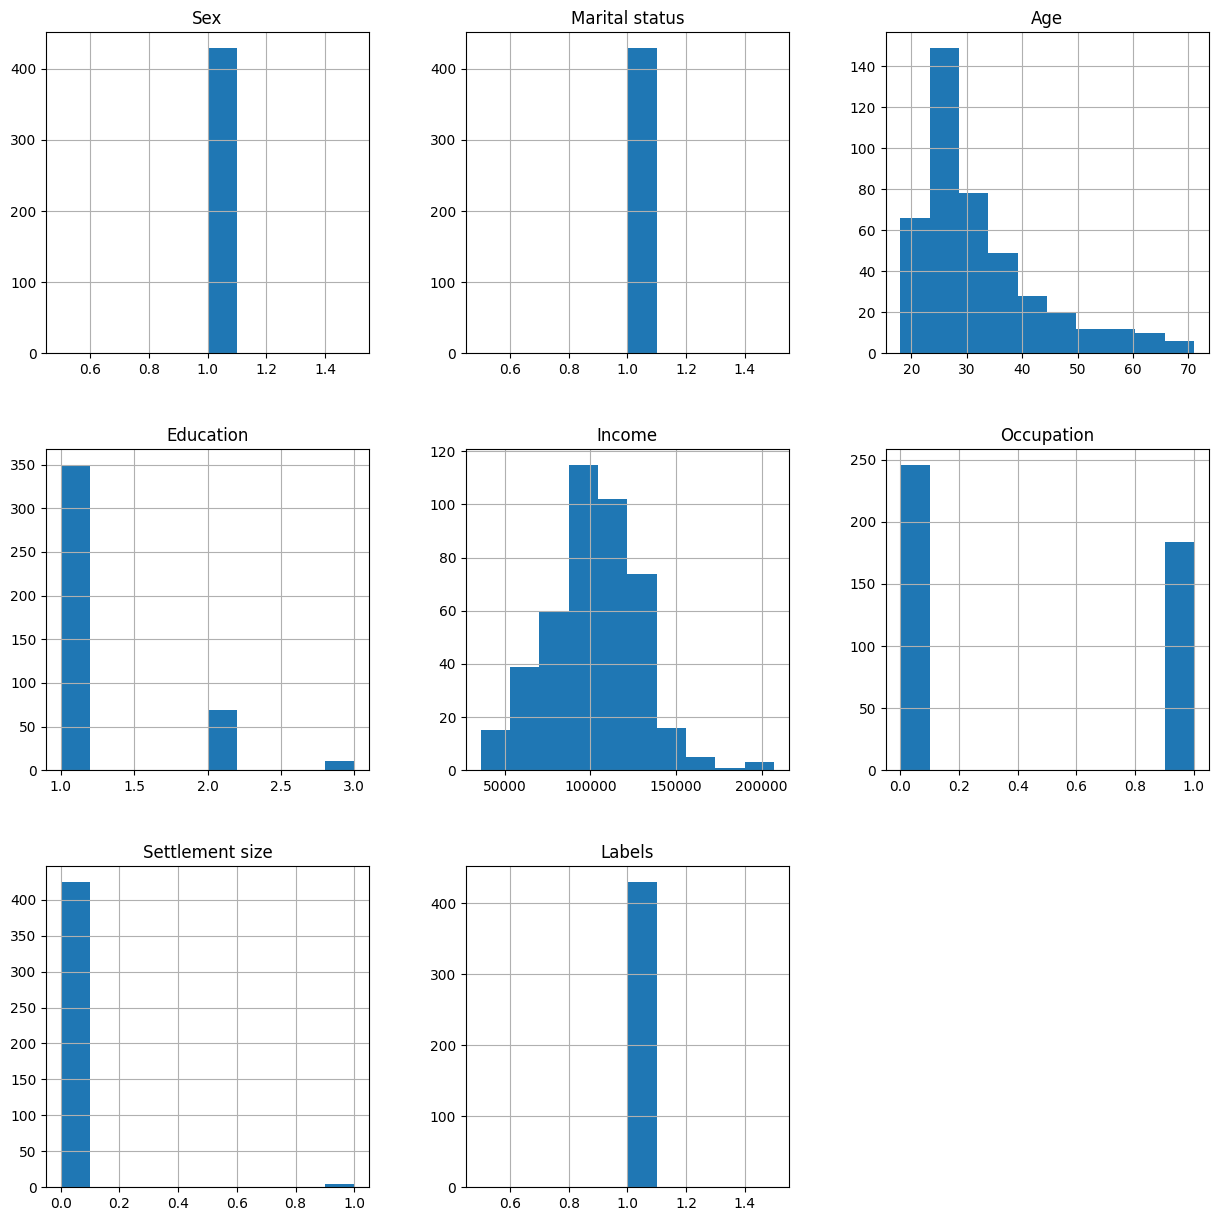

In [48]:
results_df[results_df['Labels'] == 1].hist(figsize=(15,15));

Notes:

* Sex : Perempuan
  
  Marital Status : Menikah
  
  Education : Mempunyai tingkat pendidikan tidak jauh berbeda dengan pengunjung lain

  Age : Rata-rata berusia lebih muda dari pengunjung lain

  Income : Rata-rata berpenghasilan lebih kecil dari penghasilan pengunjung lain

  Occupation : Rata-rata Tidak Bekerja atau Karyawan

  Setlement size : Kota Kecil


### Cluster 2

In [49]:
summary[2].applymap('{0:.0f}'.format)

,count,mean,std,min,25%,50%,75%,max
Sex,306,1,0,1,1,1,1,1
Marital status,306,1,0,1,1,1,1,1
Age,306,34,13,18,25,29,40,76
Education,306,1,1,1,1,1,2,3
Income,306,136537,38103,88800,108455,126778,155107,309364
Occupation,306,1,0,0,1,1,1,2
Settlement size,306,1,1,0,1,1,2,2
Labels,306,2,0,2,2,2,2,2


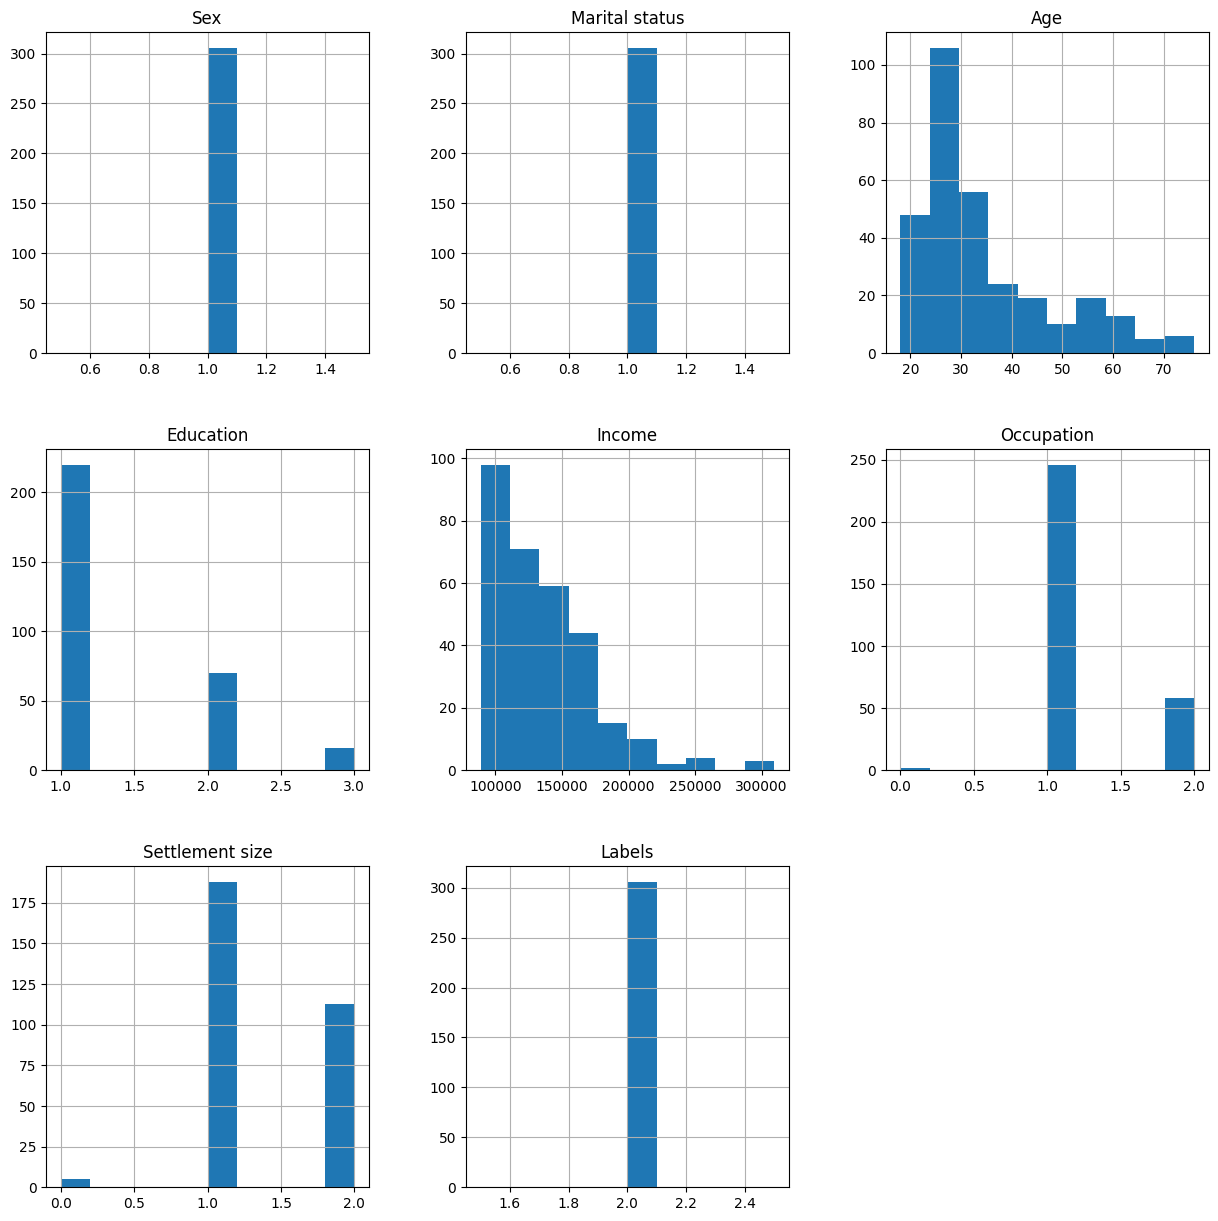

In [50]:
results_df[results_df['Labels'] == 2].hist(figsize=(15,15));

Notes:

* Sex : Perempuan
  
  Marital Status : Menikah
  
  Education : Rata-rata berpendidikan lebih tinggi dari pengunjung lain

  Age : Rata-rata berumur sama dengan kebanyakan umur pengunjung

  Income : Berpenghasilan lebih besar dari rata-rata penghasilan pengunjung lain

  Occupation : Rata-rata Karyawan atau wiraswasta

  Setlement size : Tersebar di Kota Sedang dan Kota besar

### Cluster 3

In [51]:
summary[3].applymap('{0:.0f}'.format)

,count,mean,std,min,25%,50%,75%,max
Sex,517,0,0,0,0,0,0,0
Marital status,517,0,0,0,0,0,0,0
Age,517,40,12,20,31,37,47,75
Education,517,1,1,0,0,1,1,2
Income,517,145374,38287,82398,119276,136323,159757,287247
Occupation,517,1,0,0,1,1,2,2
Settlement size,517,2,1,0,1,2,2,2
Labels,517,3,0,3,3,3,3,3


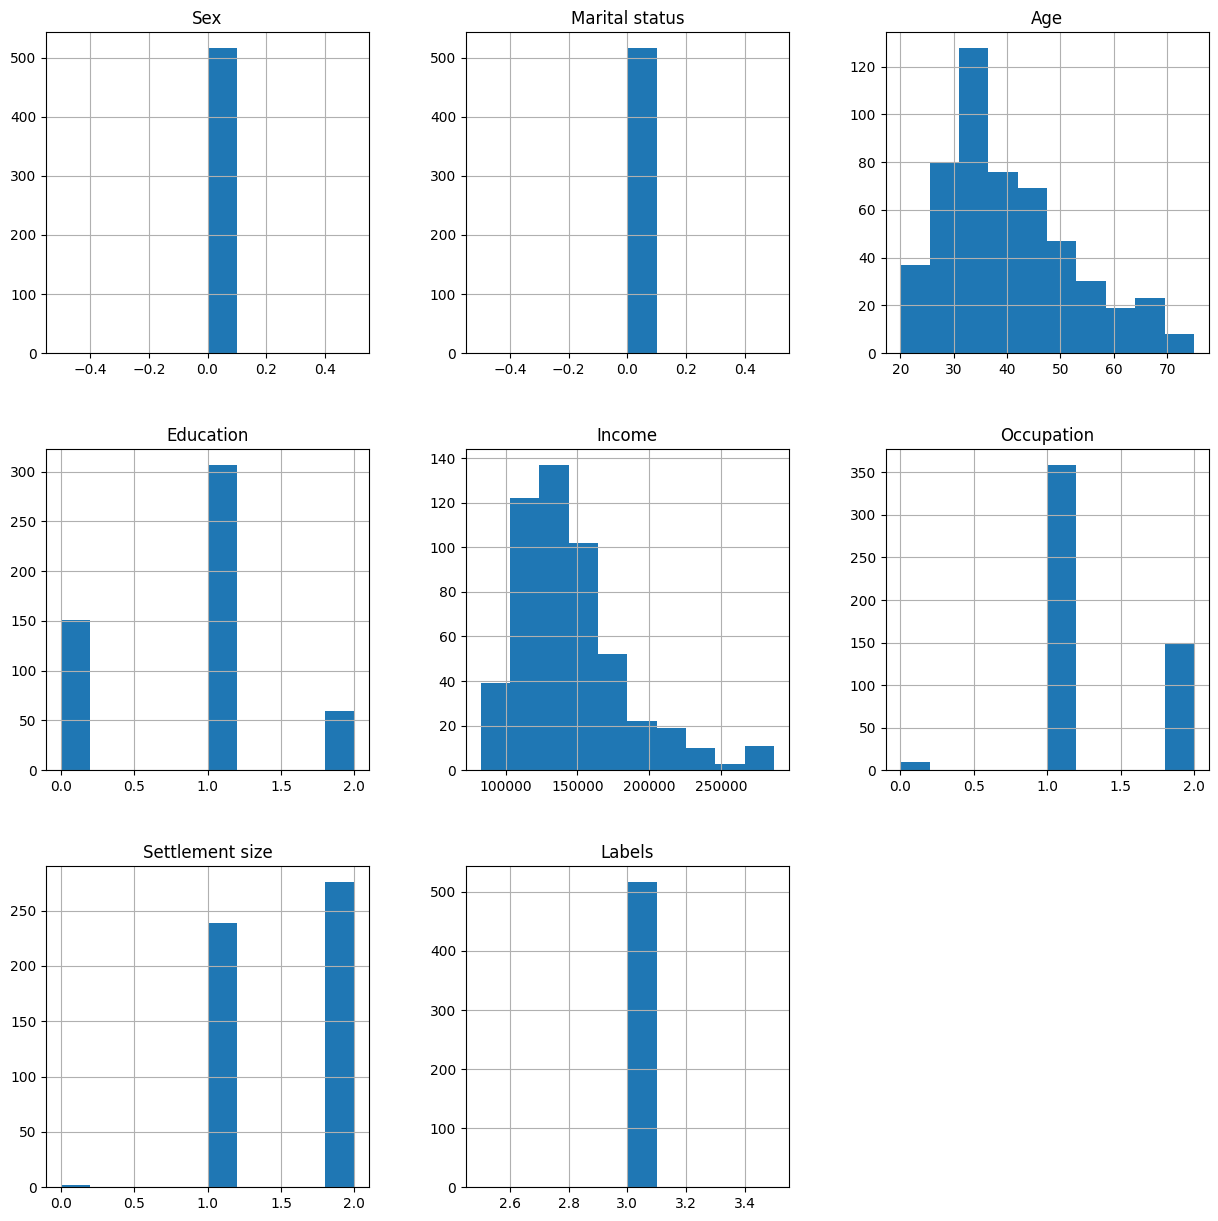

In [52]:
results_df[results_df['Labels'] == 3].hist(figsize=(15,15));

Notes:

* Sex : Laki-laki 
  
  Marital Status : Single
  
  Education : Tingkat pendidikan berbeda-beda

  Age : Rata-rata berumur lebih tua dari pengunjung lain

  Income : Rata-rata berpenghasilan lebih tinggi dari pengunjung lain

  Occupation : Rata-rata Karyawan atau Wiraswasta

  Setlement size : Tersebar di Kota Besar dan Kota Kecil

### Cluster 4

In [53]:
summary[4].applymap('{0:.0f}'.format)

,count,mean,std,min,25%,50%,75%,max
Sex,257,0,0,0,0,0,0,0
Marital status,257,1,0,1,1,1,1,1
Age,257,34,11,18,26,31,40,67
Education,257,1,1,1,1,1,1,3
Income,257,122977,38529,62263,96769,115369,146519,280570
Occupation,257,1,1,0,1,1,1,2
Settlement size,257,1,1,0,0,1,2,2
Labels,257,4,0,4,4,4,4,4


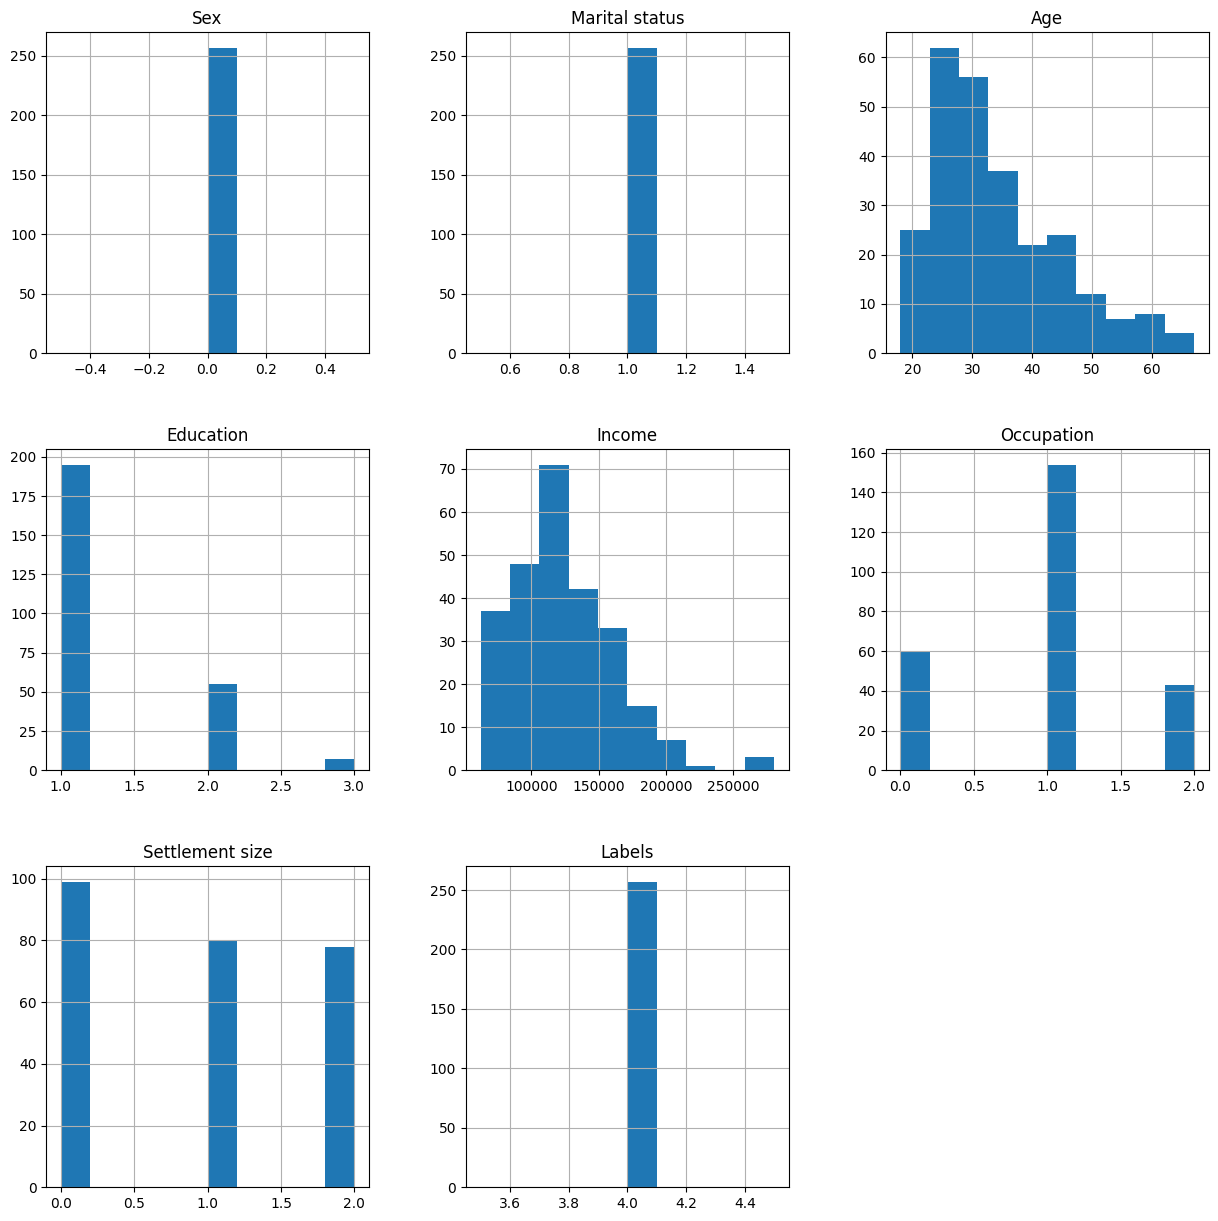

In [65]:
results_df[results_df['Labels'] == 4].hist(figsize=(15,15));

Notes:

* Sex : Laki-laki
  
  Marital Status : Menikah
  
  Education : Rata-rata berpendidikan lebih tinggi dari pengunjung lain

  Age : Berumur tidak jauh berbeda dengan umur pengunjung lain.

  Income : Mempunyai pendapatan seperti rata-rata pengunjung lain

  Occupation : Berbeda-beda pekerjaannya.

  Setlement size : Tersebar di semua kota

### Cluster 5

In [54]:
summary[5].applymap('{0:.0f}'.format)

,count,mean,std,min,25%,50%,75%,max
Sex,178,1,0,1,1,1,1,1
Marital status,178,0,0,0,0,0,0,0
Age,178,35,10,19,27,34,41,70
Education,178,1,1,0,1,1,1,3
Income,178,97997,21702,36760,80892,101511,113265,143321
Occupation,178,0,1,0,0,0,1,2
Settlement size,178,0,0,0,0,0,0,1
Labels,178,5,0,5,5,5,5,5


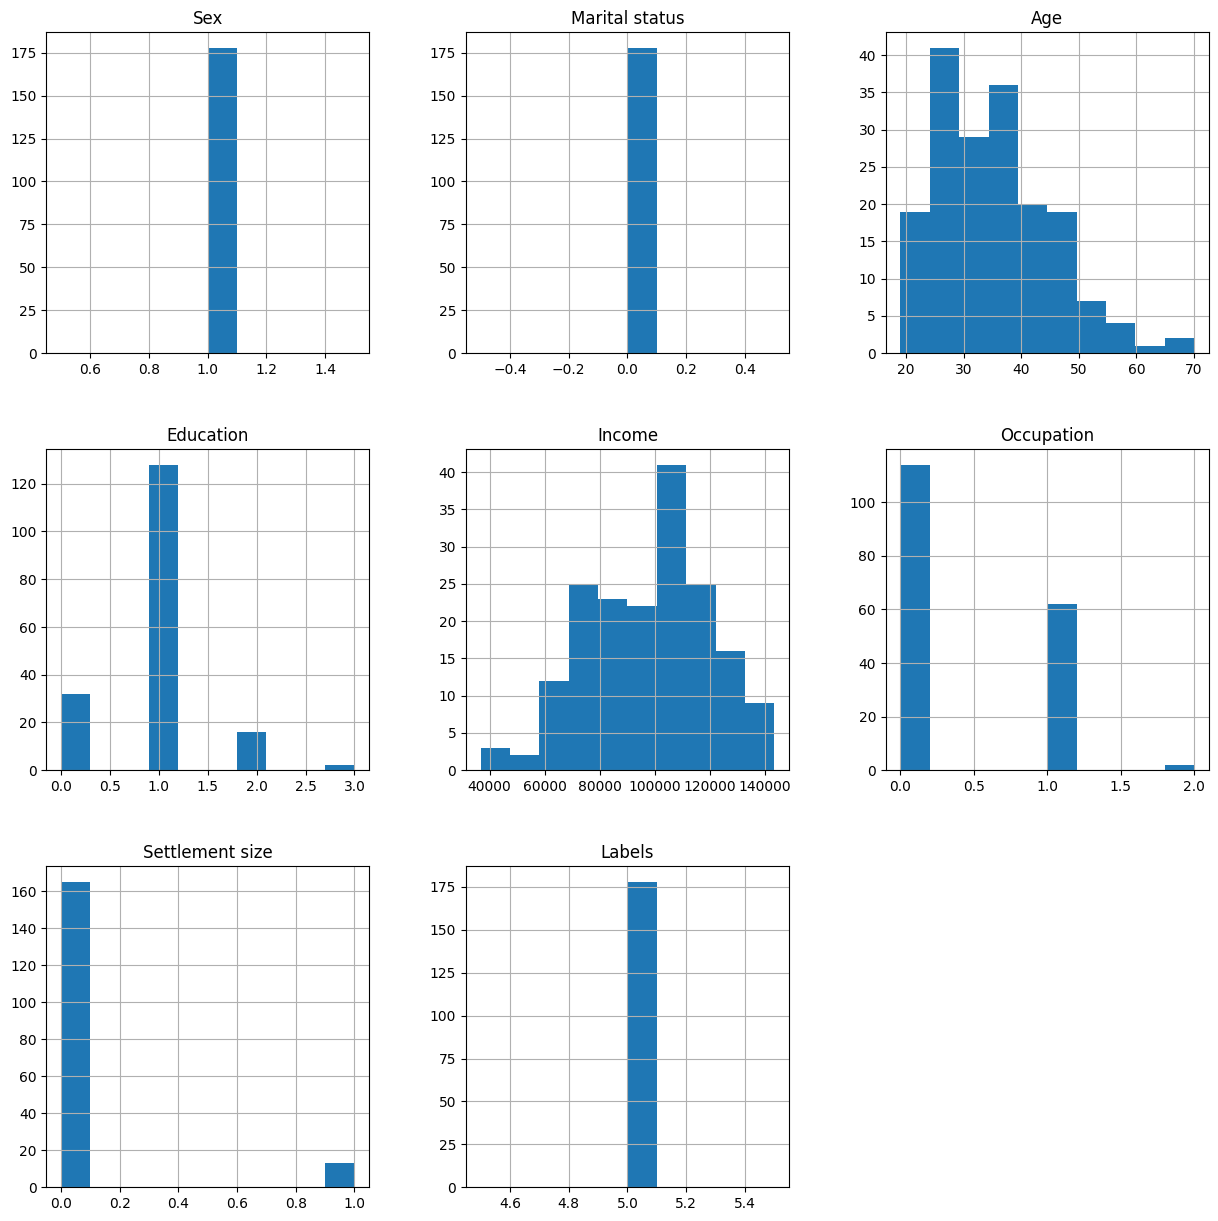

In [55]:
results_df[results_df['Labels'] == 5].hist(figsize=(15,15));

Notes:

* Sex : Perempuan 
  
  Marital Status : Single
  
  Education : SMA

  Age : Berumur hampir sama dengan umur pengunjung lain

  Income : Penghasilan lebih rendah dari rata-rata penghasil pengunjung lain

  Occupation : Rata-rata Tidak Bekerja atau Karyawan

  Setlement size : Kota Kecil

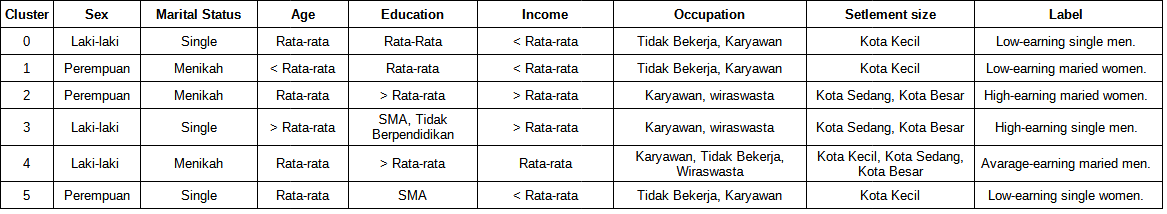

## Cara alternatif untuk menginterpretasikan cluster

### Menggunakan centroid cluster sebagai sarana untuk memahami cluster itu sendiri

In [56]:
centroids = kmeans.cluster_centers_
pd.DataFrame(centroids, columns = results_df.columns[:7], index = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5'])

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
C0,3.885781e-16,1.332268e-15,0.245726,0.182692,0.030449,0.451144,0.484804
C1,1.000000e+00,1.000000e+00,0.403876,0.213953,0.005814,0.448891,0.375836
C2,1.000000e+00,1.000000e+00,0.444444,0.591503,0.676471,0.585119,0.405291
C3,2.553513e-15,1.776357e-15,0.274017,0.633462,0.764990,0.615822,0.524984
C4,-3.885781e-16,1.000000e+00,0.422827,0.466926,0.459144,0.530253,0.409658
C5,1.000000e+00,1.498801e-15,0.310861,0.185393,0.036517,0.433188,0.439125


In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

In [58]:
clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 5)

In [59]:
X_clusters = results_df.drop('Labels', axis=1)
y_clusters = results_df['Labels']

clf.fit(X_clusters, y_clusters)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)

In [66]:
import pickle
pickle.dump(clf, open('segmentation.pkl','wb'))

### Mengevaluasi model untuk memastikan interpretasi akurat

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
predictions = clf.predict(X_clusters)
print(classification_report(y_clusters, predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       312
           1       1.00      1.00      1.00       430
           2       1.00      0.99      1.00       306
           3       1.00      0.98      0.99       517
           4       1.00      1.00      1.00       257
           5       1.00      1.00      1.00       178

    accuracy                           0.99      2000
   macro avg       0.99      1.00      0.99      2000
weighted avg       0.99      0.99      0.99      2000



Model tampaknya sangat akurat dalam memprediksi nilai kelas, sehingga kita dapat mengharapkan titik perpecahan juga cukup akurat. Kami akan melanjutkan dengan interpretasi model menggunakan teknik ini.

### Visualisasi pohon cluster

Saya menyebut pohon berikut sebagai 'Pohon Pengelompokan' karena membantu dalam menentukan parameter algoritma pengelompokan dan memberikan gambaran bagaimana data harus ditafsirkan dari hasil kami. Pohon pengelompokan mengembalikan hasil yang ditunjukkan di bawah ini, penting untuk dicatat bahwa cluster diberi nama dalam urutan yang sama seperti yang didefinisikan di bagian sebelumnya.

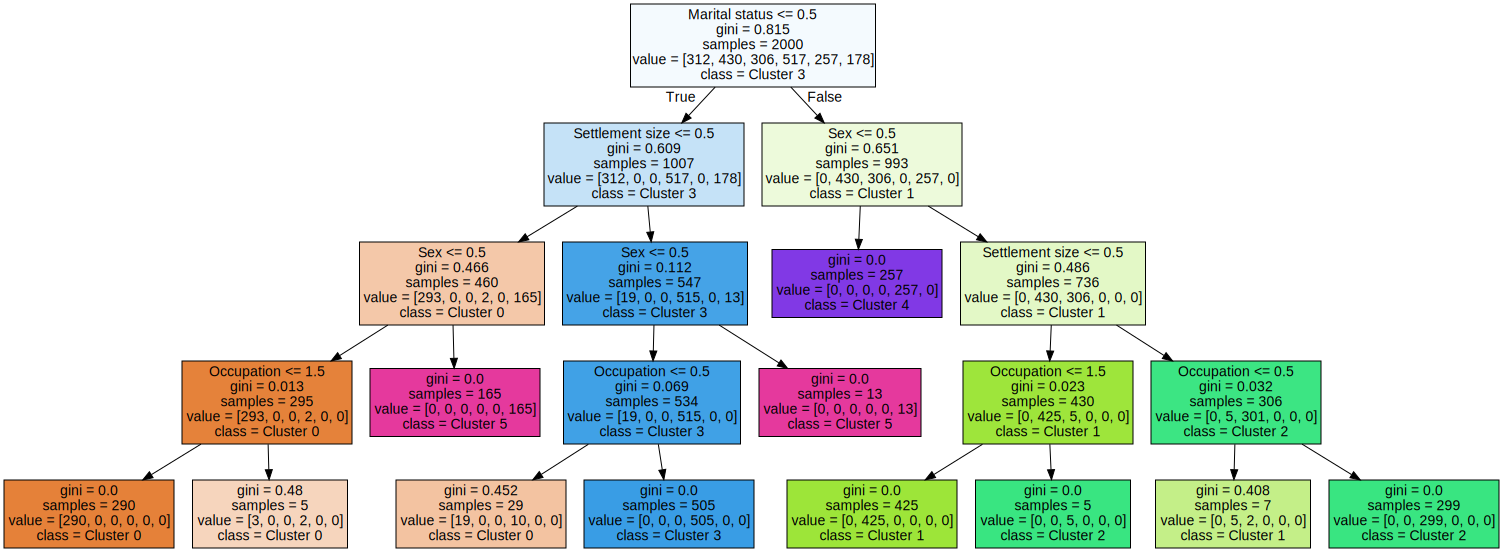

In [62]:
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=results_df.columns[:7],  
                                class_names=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph
#plt.savefig('DecisionTree.png') 